<a href="https://colab.research.google.com/github/rypriyanka2005/Machine-Learning-Sem-4/blob/MLlabs/MLLAB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Columns:
['Customer', 'Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Payment (Rs)', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Candy', 'Mango', 'Milk']
Rank of X: 3
Cost of Product: [ 1. 55. 18.]
NumPy Mean: 1560.6634538152612
Formula Mean: 1560.6634538152612
NumPy Variance: 58496.49239931618
Formula Variance: 58496.49239931616
Wednesday Sample Mean: nan
April Sample Mean: 1698.9526315789474
Probability of Loss: 0.4979919678714859
Probability of Win on Wednesday: nan
Conditional Probability of Profit Given Wednesday: nan


/tmp/ipython-input-3303207594.py:92: RuntimeWarning: invalid value encountered in scalar divide
  return profit_count / len(filtered_df)
/tmp/ipython-input-3303207594.py:97: RuntimeWarning: invalid value encountered in scalar divide
  return profit_count / len(day_df)


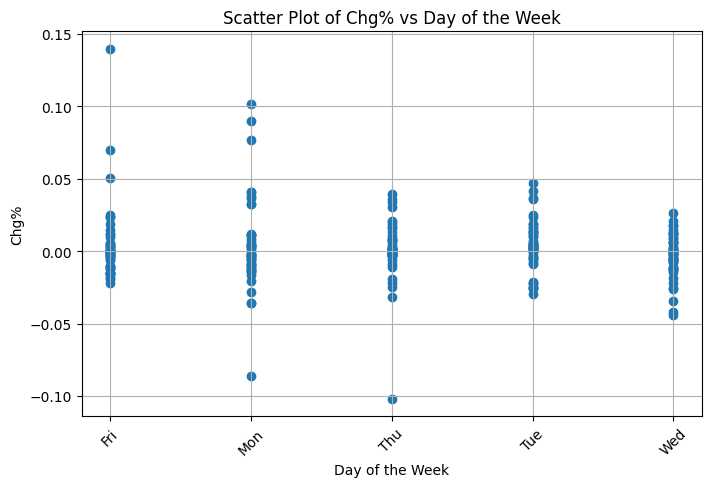

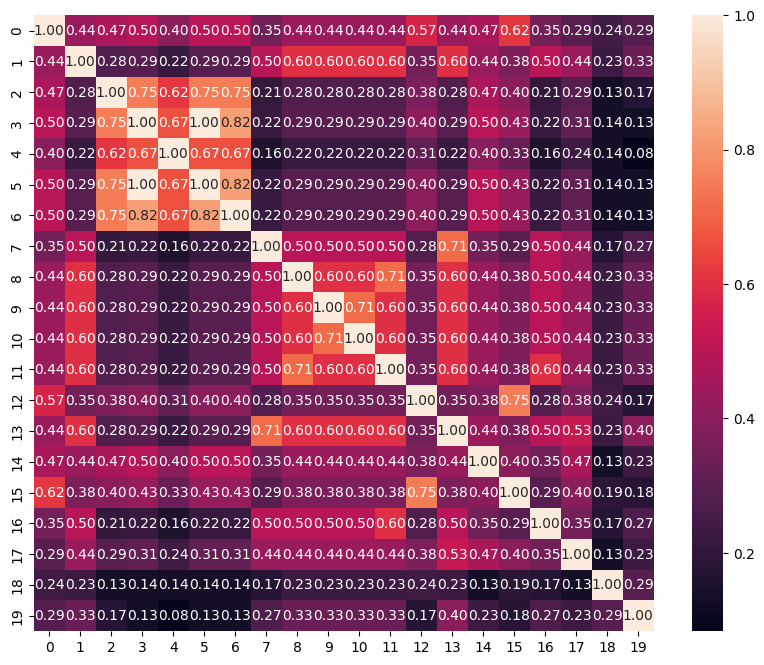

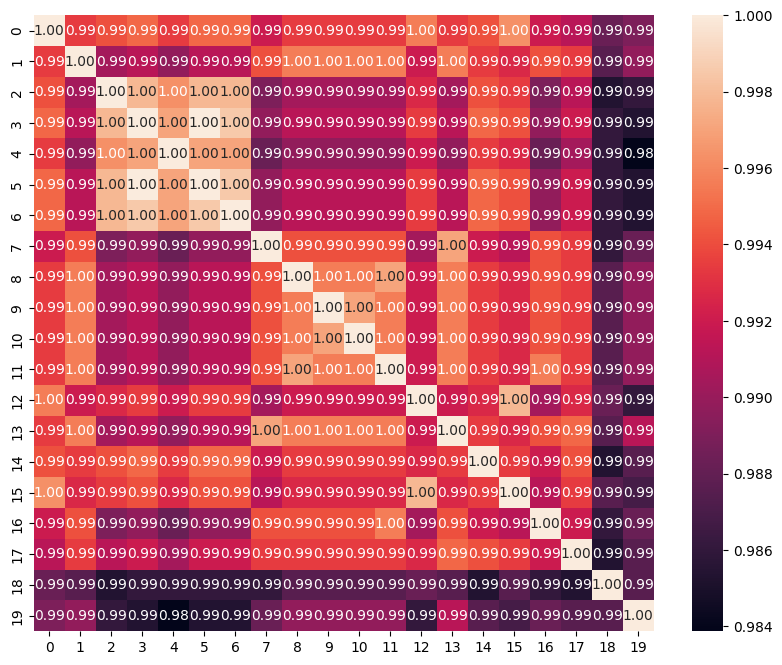

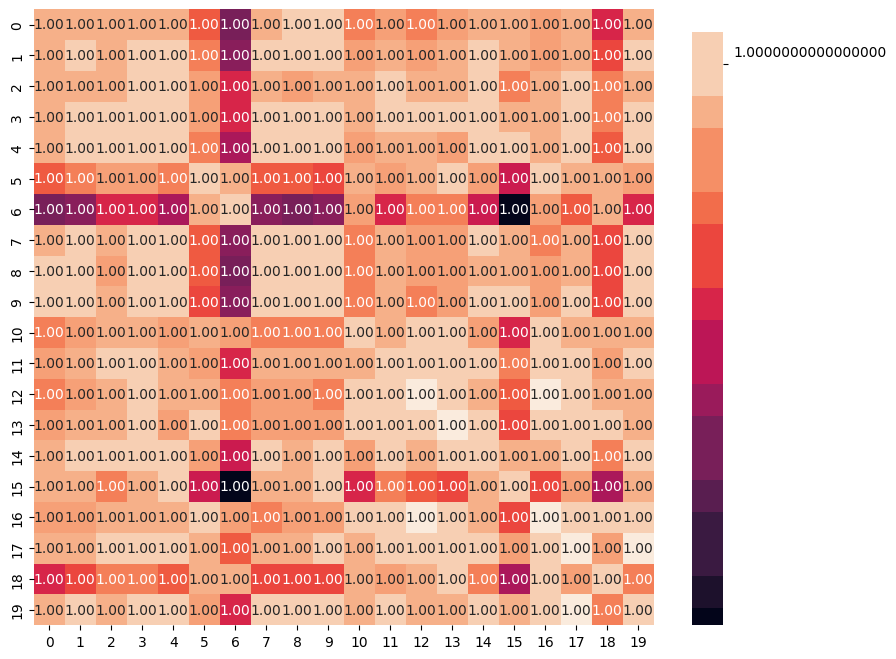

(9172, 1366)
(9172, 1366)


In [4]:
# A1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#Importing File
df = pd.read_excel('/content/Lab Session Data.xlsx',sheet_name=0)
df.head()
print("Columns:")
print(df.columns.tolist())
X = df[['Candies (#)','Mangoes (Kg)','Milk Packets (#)']]
Y = df['Payment (Rs)']

def rankOfMatrix(X):
  rankOfMatrix = np.linalg.matrix_rank(X)
  return rankOfMatrix

def inverseOfMatrix(X):
  inverseOfMatrix = np.linalg.pinv(X)
  return inverseOfMatrix

def CostOfProduct(X,Y):
  X_inverse = inverseOfMatrix(X)
  costOfProduct = X_inverse @ Y
  return costOfProduct

rank = rankOfMatrix(X)
print("Rank of X:", rank)
CostOfProduct(X,Y)
# Finding C in XC=Y
cost = CostOfProduct(X,Y)
print("Cost of Product:", cost)


#A2
#use logistic re
def add_purchaserBehavior(df, Y, cutoff, position=5):
    values = Y.apply(lambda i: 'Rich' if i > cutoff else 'Poor')
    df.insert(position, 'purchaserBehavior', values)
    return df

df = add_purchaserBehavior(df,Y,200,5)
df.head()
#with pd.ExcelWriter('output.xlsx', engine='xlsxwriter') as writer:
   # df.to_excel(writer, sheet_name='Sheet1', index=False)


#A3
df1 = pd.read_excel('/content/Lab Session Data.xlsx',sheet_name=1)
df1.head()

def numpymean(df1,column):
  mean = np.mean(df1[column])
  return mean

def numpyvar(df1,column):
  var = np.var(df1[column])
  return var



def meanByFormula(df1,column):
  col = df1[column]
  mean = sum(col)/len(col)
  return mean

def varByFormula(df1,column):
  col = df1[column]
  mean = meanByFormula(df1,column)
  total = 0
  for x in col:
    total += (x - mean) ** 2
  var = total / len(col)
  return var

def specDayMean(df,column,day):
  filtered_df = df1[df1['Day'] == day]
  mean = numpymean(filtered_df,column)
  return mean

def specMonthMean(df,column,month):
  filtered_df = df1[df1['Month'] == month]
  mean = numpymean(filtered_df,column)
  return mean

def probabilityOfLoss(df):
  prob_loss = df['Chg%'].apply(lambda x: 1 if x < 0 else 0).sum() / len(df)
  return prob_loss

def probabilityOfWinOnSpecficDay(df, day):
    filtered_df = df[df['Day'] == day]
    profit_count = filtered_df['Chg%'].apply(lambda x: 1 if x > 0 else 0).sum()
    return profit_count / len(filtered_df)

def conditionalProbabilityProfitGivenWednesday(df,day):
    day_df = df1[df1['Day'] == day]
    profit_count = day_df['Chg%'].apply(lambda x: 1 if x > 0 else 0).sum()
    return profit_count / len(day_df)


def scatterChgVsDay(df):
    day_codes = df['Day'].astype('category').cat.codes

    plt.figure(figsize=(8,5))
    plt.scatter(day_codes, df['Chg%'])
    plt.xlabel('Day of the Week')
    plt.ylabel('Chg%')
    plt.title('Scatter Plot of Chg% vs Day of the Week')

    plt.xticks(
        ticks=range(len(df['Day'].unique())),
        labels=df['Day'].astype('category').cat.categories,
        rotation=45
    )

    plt.grid(True)
    plt.show()

price_col = 'Price'

print("NumPy Mean:", numpymean(df1, price_col))
print("Formula Mean:", meanByFormula(df1, price_col))

print("NumPy Variance:", numpyvar(df1, price_col))
print("Formula Variance:", varByFormula(df1, price_col))

wed_mean = specDayMean(df1, price_col, 'Wednesday')
print("Wednesday Sample Mean:", wed_mean)

april_mean = specMonthMean(df1, price_col, 'Apr')
print("April Sample Mean:", april_mean)

prob_loss = probabilityOfLoss(df1)
print("Probability of Loss:", prob_loss)

wed_prob = probabilityOfWinOnSpecficDay(df1, 'Wednesday')
print("Probability of Win on Wednesday:", wed_prob)

cond_prob = conditionalProbabilityProfitGivenWednesday(df1, 'Wednesday')
print("Conditional Probability of Profit Given Wednesday:", cond_prob)

scatterChgVsDay(df1)



# A4

df = pd.read_excel('Lab Session Data.xlsx', sheet_name=2)

categorical_cols = df.select_dtypes(include='object').columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# A5

binary_cols = []
for col in df_encoded.columns:
    if set(df_encoded[col].dropna().unique()).issubset({0, 1}):
        binary_cols.append(col)

binary_df = df_encoded[binary_cols]

def freq(v1, v2):
    f11 = np.sum((v1 == 1) & (v2 == 1))
    f10 = np.sum((v1 == 1) & (v2 == 0))
    f01 = np.sum((v1 == 0) & (v2 == 1))
    f00 = np.sum((v1 == 0) & (v2 == 0))
    return f11, f10, f01, f00

def jaccard(f11, f10, f01):
    return f11 / (f11 + f10 + f01) if (f11 + f10 + f01) != 0 else 0

def smc(f11, f10, f01, f00):
    return (f11 + f00) / (f11 + f10 + f01 + f00)

# A6

def cosine(v1, v2):
    denom = np.linalg.norm(v1) * np.linalg.norm(v2)
    return np.dot(v1, v2) / denom if denom != 0 else 0

# A7

df20 = df_encoded.iloc[:20]

JC = np.zeros((20, 20))
SMC = np.zeros((20, 20))
COS = np.zeros((20, 20))

for i in range(20):
    for j in range(20):
        f11, f10, f01, f00 = freq(
            binary_df.iloc[i].values,
            binary_df.iloc[j].values
        )
        JC[i, j] = jaccard(f11, f10, f01)
        SMC[i, j] = smc(f11, f10, f01, f00)
        COS[i, j] = cosine(
            df20.iloc[i].values,
            df20.iloc[j].values
        )

plt.figure(figsize=(10, 8))
sns.heatmap(JC, annot=True, fmt=".2f")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(SMC, annot=True, fmt=".2f")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(COS, annot=True, fmt=".2f")
plt.show()

# A8

def has_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    return ((series < Q1 - 1.5*IQR) | (series > Q3 + 1.5*IQR)).any()

for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        if has_outliers(df[col].dropna()):
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mean(), inplace=True)

for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

# A9

df_scaled = pd.get_dummies(df, drop_first=True)

minmax = MinMaxScaler()
df_minmax = minmax.fit_transform(df_scaled)

zscore = StandardScaler()
df_zscore = zscore.fit_transform(df_scaled)

print(df_minmax.shape)
print(df_zscore.shape)